In [1]:
import numpy as np
import pandas as pd
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('winequality.csv')

In [5]:
data.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,W0001,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,W0002,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,NaN,9.5,0
2,W0003,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,NaN,10.1,0
3,W0004,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,W0005,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [4]:
data.loc[data.quality == 2, 'quality'] = 0

In [6]:
X = data.drop(['ID', 'quality'], axis = 1)
y = data.quality

In [7]:
X.fillna(X.mean(), inplace = True)[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.450000,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.490158,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.490158,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.400000,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.400000,9.9


In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
forest = RandomForestClassifier(n_estimators = 100, max_depth = 10)
forest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [11]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

Feature Ranking
1. feature 10 (0.200341)
2. feature 1 (0.146535)
3. feature 7 (0.104493)
4. feature 5 (0.101521)
5. feature 4 (0.078369)
6. feature 6 (0.073875)
7. feature 3 (0.073251)
8. feature 2 (0.072257)
9. feature 0 (0.053963)
10. feature 8 (0.050286)
11. feature 9 (0.045109)


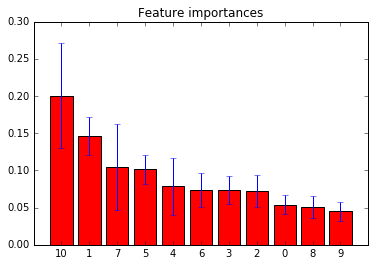

In [14]:
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

print ("Feature Ranking")

for f in range(X.shape[1]):
    print ('%d. feature %d (%f)' % (f+1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [16]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.450000,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.490158,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.490158,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.400000,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.400000,9.9
